In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [2]:
# data
data = pd.read_csv('train_data.csv', header=None)  # path of the .csv file
print(data.shape)  # to check the shape
#print(data.head(5))  # print the first 5 lines of the data

(10000, 3072)


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,52,63,45,55,68,48,62,76,63,67,...,133,170,177,133,170,177,133,164,168,128
1,74,64,62,73,63,61,77,67,65,78,...,167,163,161,164,162,160,163,162,160,163
2,70,73,87,71,74,88,71,75,88,73,...,38,3,22,35,2,21,33,1,20,33
3,69,70,5,94,102,5,96,106,1,94,...,0,84,41,2,97,70,3,125,119,3
4,19,64,102,23,75,116,12,81,122,23,...,205,131,187,193,116,176,183,103,168,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,25,16,52,42,38,55,48,47,9,...,2,18,18,11,20,20,12,21,19,11
9996,104,82,106,103,76,100,110,83,87,85,...,202,142,132,154,212,202,224,227,217,239
9997,255,255,204,253,255,203,254,255,209,255,...,121,206,207,164,246,250,199,255,255,206
9998,255,255,255,250,251,251,251,252,252,251,...,255,255,255,255,254,254,254,255,255,255


In [4]:
data=data.to_numpy()

In [5]:
data = data.reshape(10000, 32, 32, 3)

In [6]:
data.shape

(10000, 32, 32, 3)

In [7]:
data

array([[[[ 52,  63,  45],
         [ 55,  68,  48],
         [ 62,  76,  63],
         ...,
         [153, 167, 129],
         [159, 173, 134],
         [165, 176, 141]],

        [[ 58,  67,  53],
         [ 62,  74,  59],
         [ 66,  79,  72],
         ...,
         [163, 175, 137],
         [158, 171, 133],
         [157, 170, 131]],

        [[ 48,  57,  44],
         [ 68,  79,  68],
         [ 77,  90,  87],
         ...,
         [150, 159, 122],
         [159, 168, 132],
         [157, 169, 127]],

        ...,

        [[180, 181, 156],
         [166, 167, 141],
         [168, 169, 143],
         ...,
         [149, 157, 111],
         [150, 158, 108],
         [158, 166, 117]],

        [[181, 184, 155],
         [169, 173, 145],
         [172, 175, 147],
         ...,
         [149, 157, 112],
         [159, 167, 120],
         [164, 170, 125]],

        [[175, 180, 146],
         [172, 176, 149],
         [166, 170, 141],
         ...,
         [170, 177, 133],
        

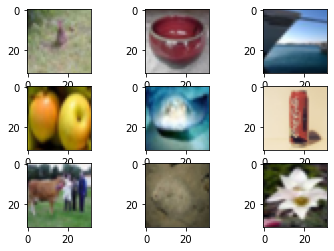

In [8]:
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(data[i])
pyplot.show()

In [9]:
label = pd.read_csv('train_label.csv')

In [10]:
label

,id,label
0,0,65
1,1,10
2,2,71
3,3,0
4,4,67
...,...,...
9995,9995,51
9996,9996,74
9997,9997,6
9998,9998,39


In [11]:
y = label['label']
X = data / 255.0

In [12]:
y

0       65
1       10
2       71
3        0
4       67
        ..
9995    51
9996    74
9997     6
9998    39
9999    23
Name: label, Length: 10000, dtype: int64

In [13]:
# Create the model
from tensorflow.keras.losses import sparse_categorical_crossentropy
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
input_shape = (img_width, img_height, img_num_channels)
validation_split = 0.2
verbosity = 1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(no_classes, activation='softmax'))

model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [14]:
# Fit the model
model.fit(X, y, epochs=no_epochs, batch_size=32)


Epoch 1/100
313/313 [==============================] - 7s 5ms/step - loss: 4.4775 - accuracy: 0.0209
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 4.2297 - accuracy: 0.0426
Epoch 3/100
313/313 [==============================] - 1s 4ms/step - loss: 4.0381 - accuracy: 0.0679
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 3.8679 - accuracy: 0.0936
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 3.6971 - accuracy: 0.1161
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 3.5644 - accuracy: 0.1409
Epoch 7/100
313/313 [==============================] - 1s 4ms/step - loss: 3.4248 - accuracy: 0.1687
Epoch 8/100
313/313 [==============================] - 1s 4ms/step - loss: 3.2977 - accuracy: 0.1886
Epoch 9/100
313/313 [==============================] - 1s 4ms/step - loss: 3.1715 - accuracy: 0.2069
Epoch 10/100
313/313 [==============================] - 1s 4ms/step - loss: 3.0756 - accura

313/313 [==============================] - 1s 4ms/step - loss: 0.4948 - accuracy: 0.8473
Epoch 82/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5176 - accuracy: 0.8453
Epoch 83/100
313/313 [==============================] - 1s 5ms/step - loss: 0.5107 - accuracy: 0.8435
Epoch 84/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4838 - accuracy: 0.8529
Epoch 85/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.8421
Epoch 86/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4984 - accuracy: 0.8440
Epoch 87/100
313/313 [==============================] - 1s 4ms/step - loss: 0.5259 - accuracy: 0.8398
Epoch 88/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4869 - accuracy: 0.8566
Epoch 89/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.8532
Epoch 90/100
313/313 [==============================] - 1s 4ms/step - loss: 0.4741 - accuracy: 

In [15]:
test_data = pd.read_csv('test_data.csv', header=None)  # path of the .csv file
print(test_data.shape)

(2000, 3072)


In [16]:
test_data=test_data.to_numpy()
test_data = test_data.reshape(2000, 32, 32, 3)

In [17]:
test_data

array([[[[ 43,  24,   1],
         [ 67,  28,   6],
         [ 83,  41,  17],
         ...,
         [ 80, 121,  16],
         [ 78, 119,  16],
         [ 80, 120,  22]],

        [[ 36,  18,   1],
         [ 52,  20,   4],
         [ 57,  27,  10],
         ...,
         [ 82, 123,  19],
         [ 84, 124,  24],
         [ 86, 125,  31]],

        [[ 39,  18,   3],
         [ 55,  27,  14],
         [ 43,  23,  11],
         ...,
         [ 89, 129,  32],
         [ 89, 128,  34],
         [ 88, 127,  37]],

        ...,

        [[ 56, 100,  10],
         [ 61, 106,  12],
         [ 64, 107,  11],
         ...,
         [ 14,  20,   5],
         [ 10,   9,   4],
         [ 13,   9,   3]],

        [[ 59, 104,  14],
         [ 62, 106,  12],
         [ 62, 105,   9],
         ...,
         [ 11,  14,   6],
         [ 13,  10,   7],
         [ 15,   9,   3]],

        [[ 54,  98,   8],
         [ 54,  99,   5],
         [ 55,  98,   2],
         ...,
         [ 10,  10,   5],
        

In [18]:
prediction=model.predict(test_data)

In [19]:
prediction.shape

(2000, 100)

In [20]:
pred=np.argmax(prediction, axis=1)

In [21]:
pred.shape

(2000,)

In [22]:
pred

array([ 0,  1, 17, ..., 22,  1, 47], dtype=int64)

In [23]:
data_frame = pd.DataFrame(pred, columns=['label'])


# converting data frame to csv
data_frame.to_csv("handmade.csv", index_label='id')
